In [1]:
import numpy as np
from scipy.stats import norm, invgamma, gaussian_kde
from matplotlib import pyplot as plt
from __future__ import division
import LDAspec as lda
%matplotlib inline

In [2]:
def gibbs(y, mu_0, sigma2_0, alpha, beta, n_samples):
    """
    Assuming liklihood and priors
        y_i ~ N(mu, sigma2)
        mu ~ N(mu, sigma2)
        sigma2 ~ inv_gamma(alpha, beta)
    Sample from the posterior dist
        P(mu, sigma2 | y, mu, sigma2, alpha, beta)
    using a Gibbs sampler
    
    Parameters:
    
    """
    N = y.shape[0]
    sigma = np.sqrt(sigma2_0)
    mu = mu_0
    alpha_star = alpha
    beta_star = beta
    mu_samples = []
    sigma_samples = []
    
    for i in xrange(n_samples):
        sigma_sample = invgamma.rvs(alpha_star, scale=beta_star, size=1)
        sigma2_star = (1/sigma2_0 + N/sigma_sample)**-1
        mu_star = sigma2_star*(mu_0/sigma2_0 + np.sum(y)/sigma_sample)
        sigma_samples.append(sigma_sample[0])
        
        mu_sample = norm.rvs(loc=mu_star, scale=np.sqrt(sigma2_star), size=1)
        beta_star = beta + .5*np.sum((y-mu_sample)**2)
        if i==0:
            alpha_star += N/2
        mu_samples.append(mu_sample[0])
        
    
        
    return mu_samples, sigma_samples
        

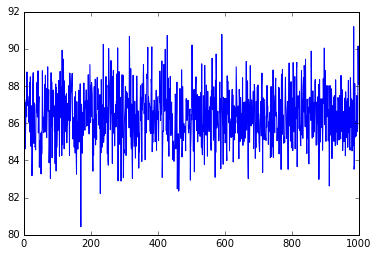

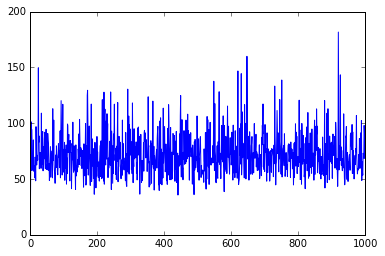

In [3]:
examscores = np.loadtxt('examscores.csv', delimiter=',')
mus, sigmas = gibbs(examscores, 80, 16, 3, 50, 1000)
plt.plot(range(1000),mus)
plt.show()
plt.plot(range(1000),sigmas)
plt.show()


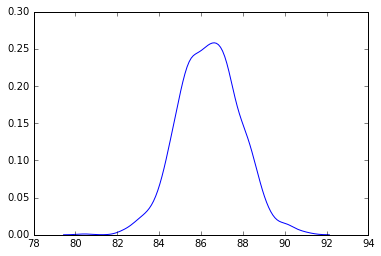

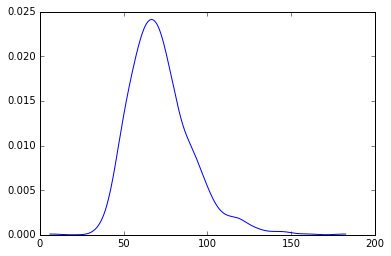

In [4]:
mu_kernal = gaussian_kde(mus)
xmin = min(mus) - 1
xmax = max(mus) + 1
x = np.arange(xmin, xmax, step=.1)
plt.plot(x, mu_kernal(x))
plt.show()

sigma_kernel = gaussian_kde(sigmas)
xmin = min(sigmas) - 1
xmax = max(sigmas) + 1
x = np.arange(xmin, xmax, step=.1)
plt.plot(x, sigma_kernel(x))
plt.show()

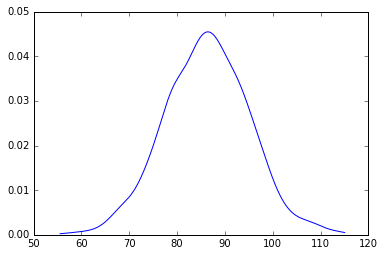

In [5]:
scores = []
for i in xrange(len(mus)):
    score = norm.rvs(loc=mus[i], scale=np.sqrt(sigmas[i]), size=1)
    scores.append(score[0])
    
#print scores
    
score_kernal = gaussian_kde(scores)
xmin = min(scores) - 1
xmax = max(scores) + 1
x = np.arange(xmin, xmax, step=.1)
plt.plot(x, score_kernal(x))
plt.show()


In [3]:
reagan = lda.LDACGS(20)
stop = lda.loadStopwords("stopwords.txt")
reagan.sample("reagan.txt")

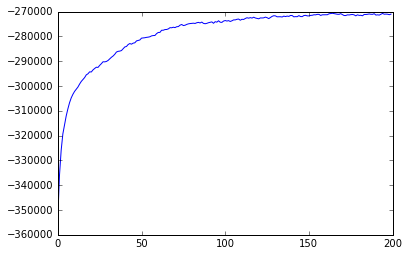

In [4]:
plt.plot(range(len(reagan.logprobs)), reagan.logprobs)
plt.show()

In [16]:
topterms = reagan.topterms(10)
topics = {"Job Creation":topterms[3], "Federal Budget":topterms[4], "Abortion":topterms[5], "Energy Industry":topterms[9],\
         "Introduction":topterms[11], "Taxes":topterms[12], "Crime":topterms[13], "International Terrorism":topterms[15], "Families":topterms[16],
         "Women's Rights":topterms[17], "Star Wars":topterms[18], "Spread of Democracy":topterms[19]}
print "Topics:"
for i in topics:
    print "\t", i
    
print "\nThere are less than 20 topics because some topics were simply speech particles, pronouns, or filler words."

Topics:
	Job Creation
	Introduction
	Spread of Democracy
	Abortion
	Taxes
	Crime
	International Terrorism
	Star Wars
	Families
	Energy Industry
	Federal Budget
	Women's Rights

There are less than 20 topics because some topics were simply speech particles, pronouns, or filler words.
